# Demo: Explorando el conjunto de datos de Iris

Vamos a empezar este tutorial con una demostración para abrirte el apetito a que quieras aprender más. En esta sección vamos a revisar rapido muchos conceptos ( por ejemplo, datos, marcas, codificaciones, agregación, tipos de datos, selecciones, etc.)

Más adelante vamos a regresar a cada uno de estos temas y los vamos a tratar con más profundidad, así que no te preocupes si parece que vamos demasiado rápido!

En el tutorial en vivo, lo vamos a hacer desde cero en un *notebook* en blanco.
Pero, por la tranquilidad de quienes quieren revisar lo que hicimos en vivo, voy ( Jake ) a tratar de reproducir los ejemplos y las discusiones aquí.

## 1. Importaciones y los Datos

Empiezo importando el [paquete de Altair](http://altair-viz.github.io/) y activo el renderizador adecuado (si es que fuese necesario):

In [1]:
import altair as alt

# Los gráficos de Altair renderizan por defecto en JupyterLab y nteract

# Descomentar/ejecutar esta linea para activar Altair en un notebook clásico (no en JupyterLab)
# alt.renderers.enable('notebook')

# Descomentar/ejecutar esta linea para activar Altair en Colab
# alt.renderers.enable('colab')

Ahora vamos a usar el paquete con conjuntos de datos ( *datasets* ) [vega_datasets package](https://github.com/altair-viz/vega_datasets), para cargar un *dataset* de ejemplo:

In [2]:
from vega_datasets import data

iris = data.iris()
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


Notar que los datos están en formato de columnas: es decir, cada columna contiene un **atributo** de un punto de datos, y cada fila contiene una sola instancia de los datos.

## 2. Gráficos Cero, Uno, y Dos-dimensional

Usando Altair, podemos empezar a explorar los datos.

El gráfico más sencillo tiene todos los datos, junto con una marca/símbolo que representa cada fila: 

In [3]:
alt.Chart(iris).mark_point()

Éste es un gráfico bastante bobo, porque consiste de 150 puntos, todos amontonados uno arriba de otro. Pero, técnicamente *es* una representación de los datos!

Para hacerlo más interesante, necesitamos *codificar* las distintas columnas en características visuales de un gráfico ( ej. posición en el eje __x__, posición en el eje **y**, el tamaño, el color, etc.)

Codifiquemos la longitud del pétalo ( *petal length* ) en el eje **x** usando el método ``encode()``:

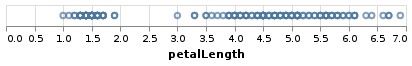

In [4]:
alt.Chart(iris).mark_point().encode(
    x='petalLength'
)

Ésto está un poco mejor, pero la marca de ``point`` probablemente no es lo mejor para un gráfico 1D como éste.

Usemos la marca ``tick`` en su lugar:

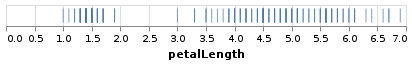

In [5]:
alt.Chart(iris).mark_tick().encode(
    x='petalLength'
)

Otra cosa que podemos hacer con los puntos es expandirlos a un gráfico 2D, codificando también el valor en __y__. Volvamos a usar los marcadores ``point``, y pongamos ``petalWidth`` (grosor del pétalo) en el eje **y**.

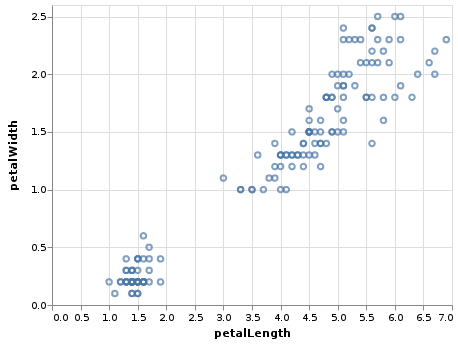

In [6]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth'
)

## 3. Interacciones sencillas

Una de las mejores características de Altair es la gramática de interacciones que brinda.
El tipo de interacción más sencilla es la habilidad de enfocar y ampliar regiones en un gráfico; Altair tiene un atajo para activarla a través del método ``interactive()``:

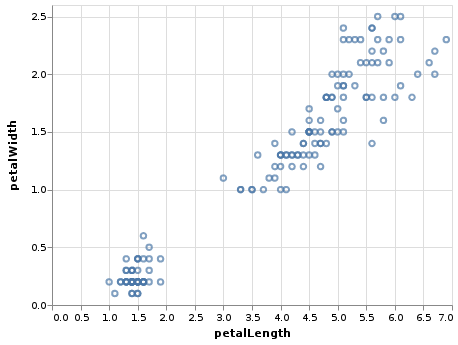

In [7]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth'
).interactive()

Ésto les permite hacer *click* y arrastrar, así también a usar el _scroll_ para ampliar y reducir regiones en el gráfico.

Más adelante vamos a ver otras interacciones.

## 4. Una tercera dimensión: el Color

Un gráfico 2D nos permite codificar dos dimensiones de los datos. Veamos cómo podemos usar el color para codificar una tercera dimensión:

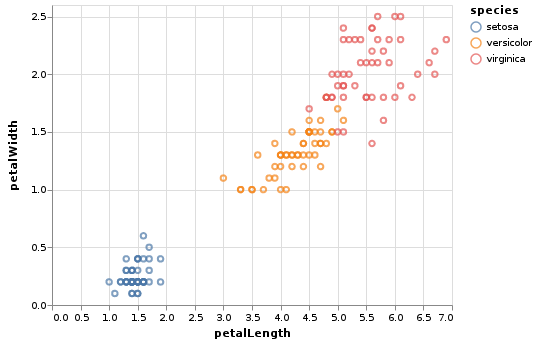

In [8]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

Noten que al usar un valor categórico para el color, elige el mapa de colores apropiado para datos categóricos.

Veamos qué pasa si usamos valores continuos para el color:

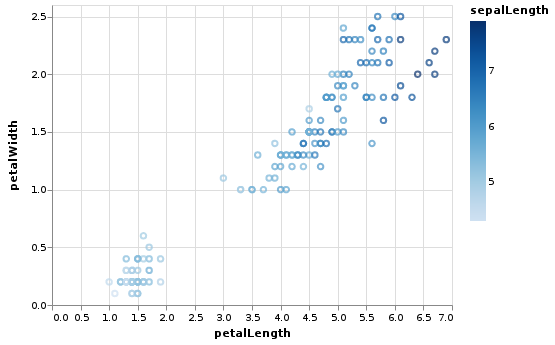

In [9]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='sepalLength'
)

Un color continuo resulta en una escala de colores apropiada para datos continuos.

Ésta es una característica clave de Altair: elige escalas apropiadas para el tipo de dato.

De igual manera, si ponemos un valor categórico en el eje x o y, también va a crear escalas discretas:

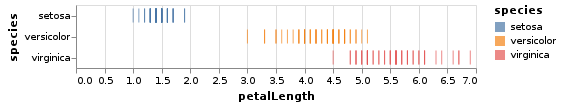

In [10]:
alt.Chart(iris).mark_tick().encode(
    x='petalLength',
    y='species',
    color='species'
)

Altair tambien puede elegir la orientacion del marcador de manera apropiada, dado el tipo de codificaciones para x e y:

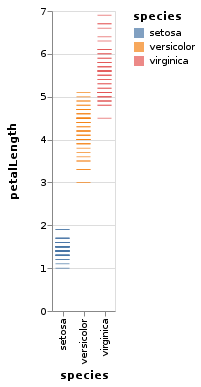

In [11]:
alt.Chart(iris).mark_tick().encode(
    y='petalLength',
    x='species',
    color='species'
)

## 5. Bineado y agregación

Regresemos rápidamente a nuestro gráfico 1D de las longitudes de los pétalos:

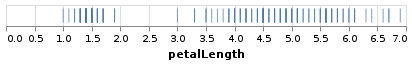

In [12]:
alt.Chart(iris).mark_tick().encode(
    x='petalLength',
)

Otra forma en la que podemos representar estos datos es con un histograma: agrupar los datos en bloques en el eje **x** y mostrar en el eje __y__ la cantidad de datos que cae en cada bloque.  

En muchas librerías gráficas ésto se hace con un método especial como ``hist()``. En Altair, el bineado y la agregación son parte de la API declarativa.

Para ir más allá del nombre de un atributo, usamos ``alt.X()`` para codificar en el eje **x**, y usamos ``'count()'`` para codificar en el eje __y__:

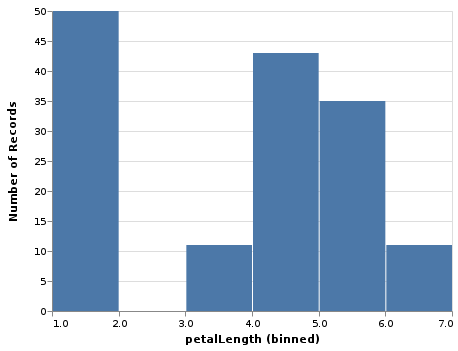

In [13]:
alt.Chart(iris).mark_bar().encode(
    x=alt.X('petalLength', bin=True),
    y='count()'
)

Si quisiéramos más control sobre los bines, podemos usar ``alt.Bin`` para ajustar sus parámetros.

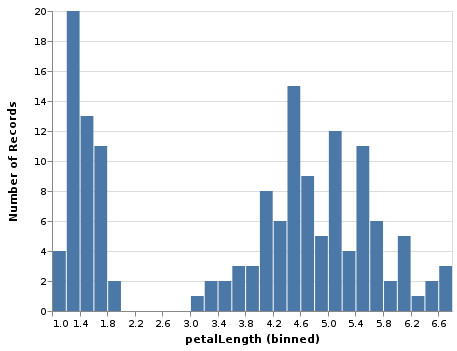

In [14]:
alt.Chart(iris).mark_bar().encode(
    x=alt.X('petalLength', bin=alt.Bin(maxbins=50)),
    y='count()'
)

Si aplicamos otra codificación ( como ``color`` ), los datos se agrupan automáticamente en cada bin:

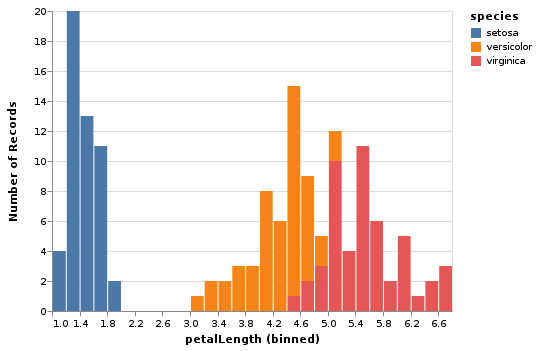

In [15]:
alt.Chart(iris).mark_bar().encode(
    x=alt.X('petalLength', bin=alt.Bin(maxbins=50)),
    y='count()',
    color='species'
)

Si prefieren un gráfico separado para cada categoría, la codificación ``column`` puede serles de ayuda:

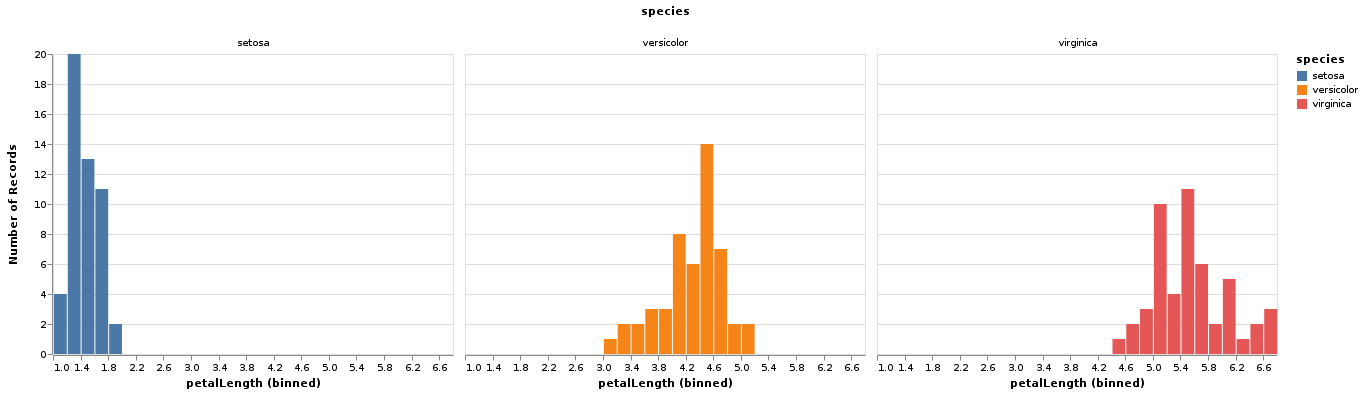

In [16]:
alt.Chart(iris).mark_bar().encode(
    x=alt.X('petalLength', bin=alt.Bin(maxbins=50)),
    y='count()',
    color='species',
    column='species'
)

El bineado y la agregación también funciona en dos dimensiones; podemos usar el marcador ``rect`` y visualizar el conteo usando el color:

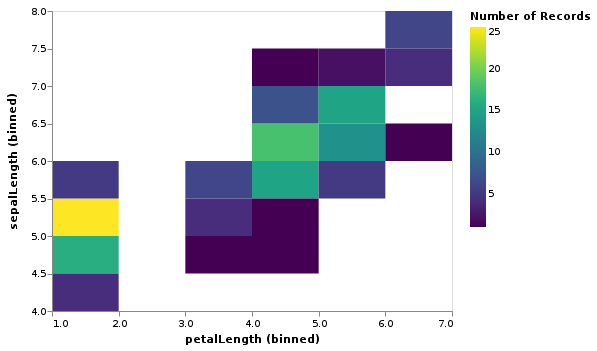

In [17]:
alt.Chart(iris).mark_rect().encode(
    x=alt.X('petalLength', bin=True),
    y=alt.Y('sepalLength', bin=True),
    color='count()'
)

Las agregaciones pueden ser mucho más que un simple conteo; también podemos agregar y calcular el promedio de una tercera cantidad dentro de cada bin

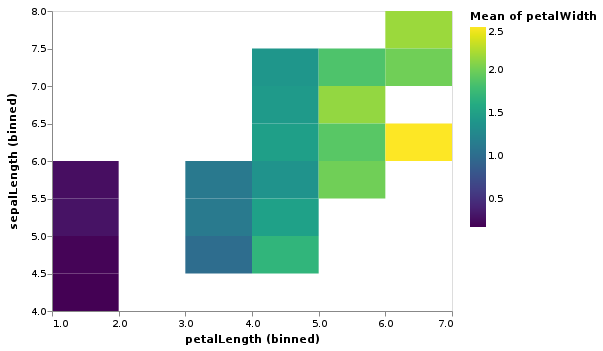

In [18]:
alt.Chart(iris).mark_rect().encode(
    x=alt.X('petalLength', bin=True),
    y=alt.Y('sepalLength', bin=True),
    color='mean(petalWidth)'
)

## 6. Apilado y superposición ( *Stacking and Layering* )

Muchas veces tener una vista con varios paneles puede ser de ayuda para detectar relaciones entre los puntos.
Altair provee las funciones ``hconcat()`` y ``vconcat``, y los operadores asociados ``|`` y ``&`` para concatenar gráficos ( notar que ésto es distinto a la vista por columna que vimos más arriba, porque ahora cada panel contiene *todos* los datos)

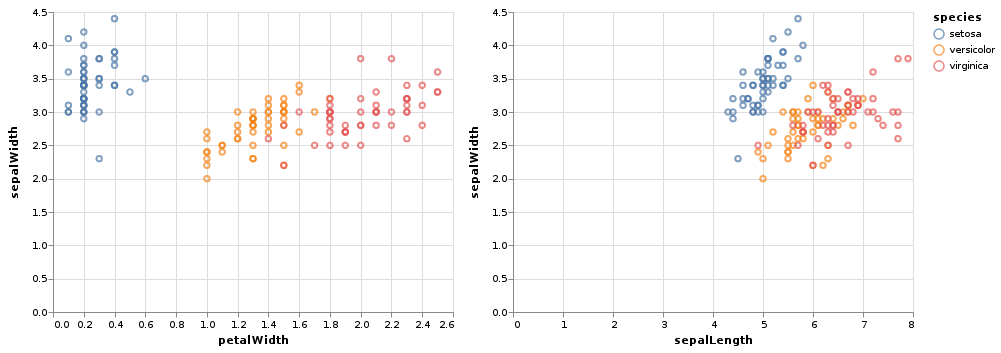

In [19]:
chart1 = alt.Chart(iris).mark_point().encode(
    x='petalWidth',
    y='sepalWidth',
    color='species'
)

chart2 = alt.Chart(iris).mark_point().encode(
    x='sepalLength',
    y='sepalWidth',
    color='species'
)

chart1 | chart2

Un truco muy útil para este tipo de situaciones es crear un gráfico base y concatenar dos copias ligeramente distintas del mismo:

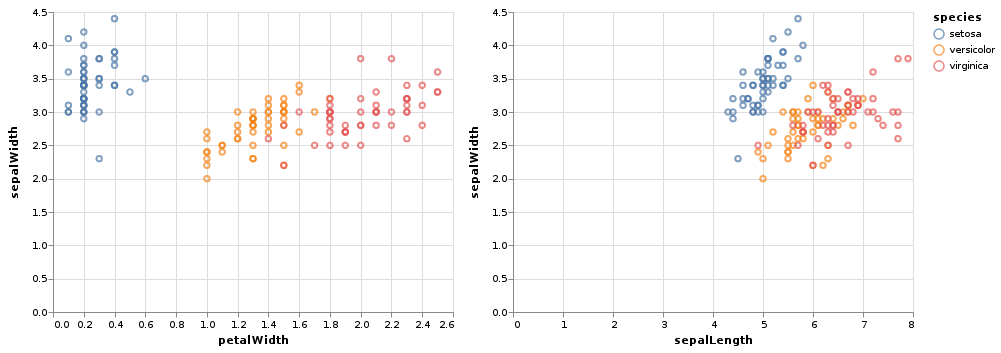

In [20]:
base = alt.Chart(iris).mark_point().encode(
    y='sepalWidth',
    color='species'
)

base.encode(x='petalWidth') | base.encode(x='sepalLength')

Otro tipo de gráfico compuesto es el gráfico en capas, construido usando ``alt.layer()`` o equivalentemente el operador ``+``.
Por ejemplo, podemos sobreponer puntos sobre el gráfico de los bines con las cuentas que vimos antes:

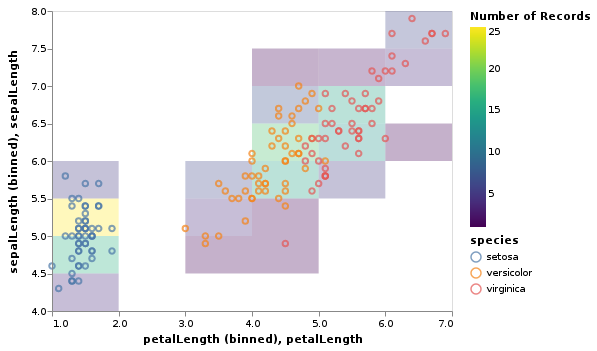

In [21]:
counts = alt.Chart(iris).mark_rect(opacity=0.3).encode(
    x=alt.X('petalLength', bin=True),
    y=alt.Y('sepalLength', bin=True),
    color='count()'
)

points = alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='sepalLength',
    color='species'
)

counts + points

A continuación, en la sección de interactividad vamos a ver un uso de este tipo de gráficos apilados.

## 7. Interactividad: Selecciones

Regresemos al gráfico de dispersión, y veamos otros tipos de interactividad que ofrece Altair:

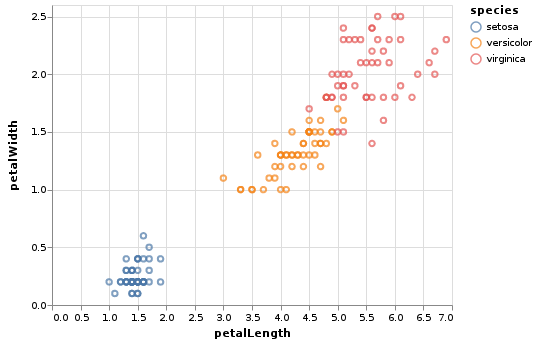

In [22]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

Recuerden que podemos agregar ``interactive()`` al final de cada gráfico para activar las escalas interactivas más básicas:

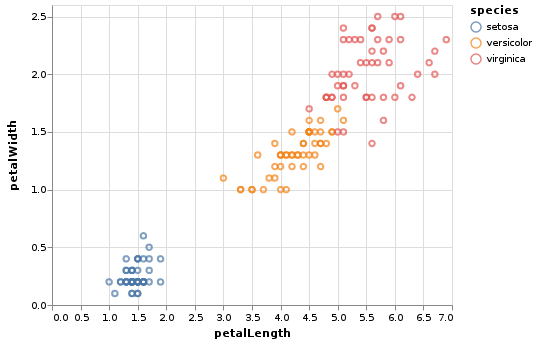

In [23]:
alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).interactive()

Altair brinda una API de general de ``selection`` para crear gráficos interactivos; por ejemplo, podemos seleccionar un intervalo:

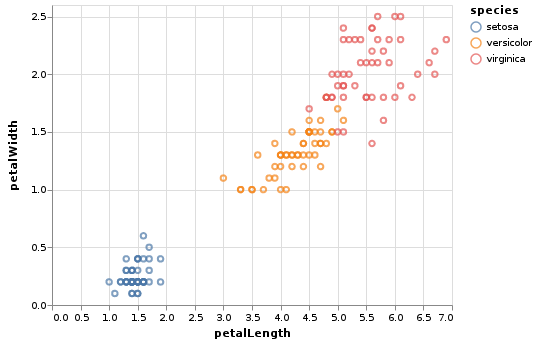

In [24]:
interval = alt.selection_interval()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
).properties(
    selection=interval
)

Actualmente esta selección no hace nada, pero podemos cambiar el color condicionalmente con la selección:

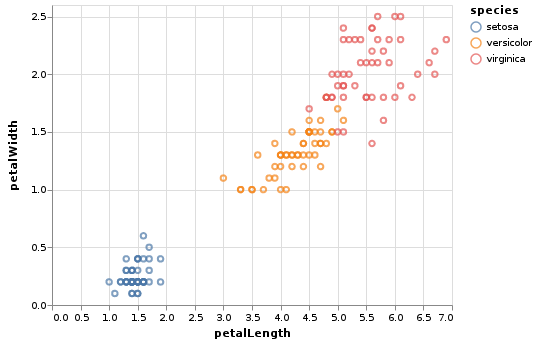

In [25]:
interval = alt.selection_interval()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color=alt.condition(interval, 'species', alt.value('lightgray'))
).properties(
    selection=interval
)

Algo muy bueno de esta API de selección es que se aplica *automáticamente* a todo el gráfico compuesto; por ejemplo, podemos concatenar horizontalmente dos gráficos, y como ambos tienen la misma selección, ambos responden apropiadamente:

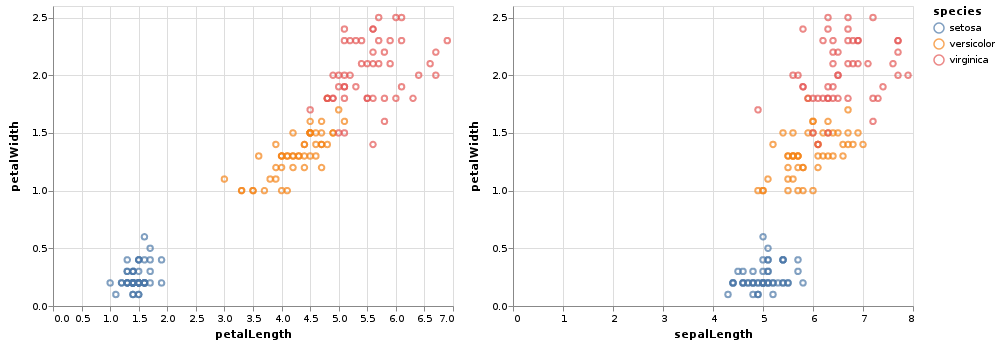

In [26]:
interval = alt.selection_interval()

base = alt.Chart(iris).mark_point().encode(
    y='petalWidth',
    color=alt.condition(interval, 'species', alt.value('lightgray'))
).properties(
    selection=interval
)

base.encode(x='petalLength') | base.encode(x='sepalLength')

Las propiedades del intervalo de selección pueden modificarse fácilmente; por ejemplo, podemos especificar que solo se aplique a la codificación en el eje x:

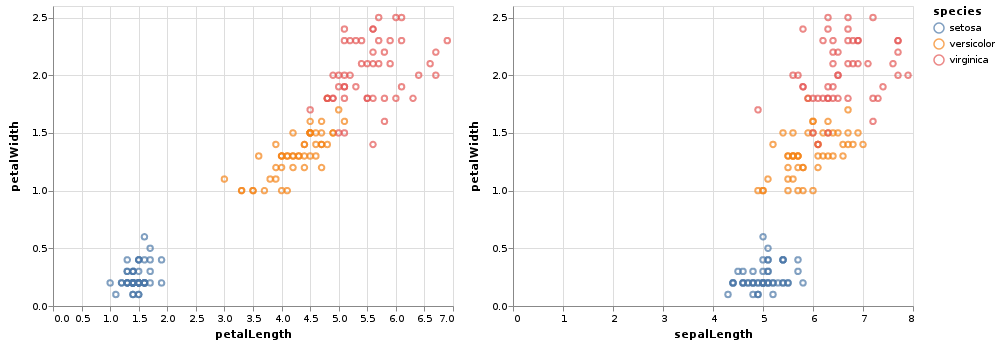

In [27]:
interval = alt.selection_interval(encodings=['x'])

base = alt.Chart(iris).mark_point().encode(
    y='petalWidth',
    color=alt.condition(interval, 'species', alt.value('lightgray'))
).properties(
    selection=interval
)

base.encode(x='petalLength') | base.encode(x='sepalLength')

Aún podemos hacer cosas más sofisticadas usando selecciones.
Por ejemplo, hagamos un histograma con el número de registros por especie, y apilémolo sobre el gráfico de dispersión:

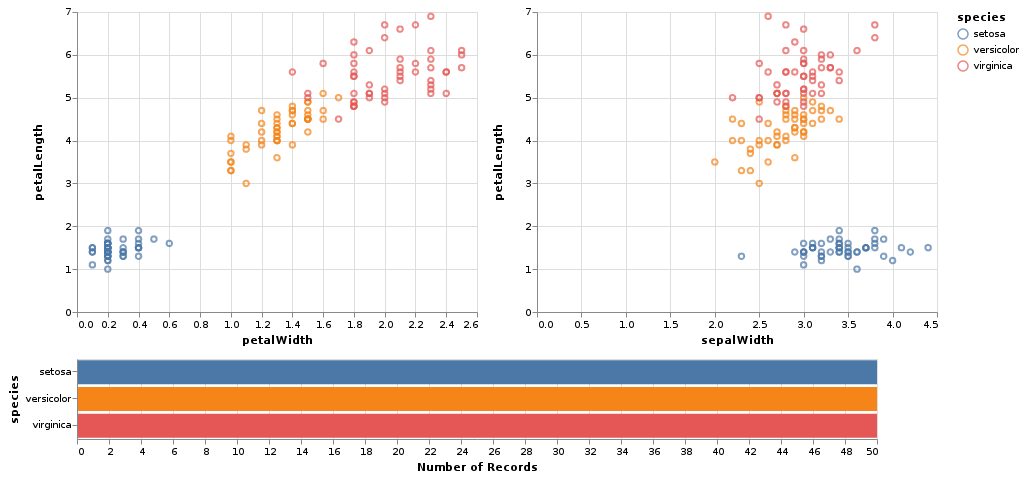

In [28]:
interval = alt.selection_interval()

base = alt.Chart(iris).mark_point().encode(
    y='petalLength',
    color=alt.condition(interval, 'species', alt.value('lightgray'))
).properties(
    selection=interval
)

hist = alt.Chart(iris).mark_bar().encode(
    x='count()',
    y='species',
    color='species'
).properties(
    width=800,
    height=80
).transform_filter(
    interval
)

scatter = base.encode(x='petalWidth') | base.encode(x='sepalWidth')

scatter & hist

Esta demostración cubrió un buen número de componentes disponibles en Altair.
En las secciones siguientes, vamos a ver cada una de manera un poco más sistemática.